In [ ]:
#그래프를 위한 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


<br>

# **ANOVA 분산분석**  

세 개 이상의 집단의 평균차이가 통계적으로 유의한 가를 검정하는 분석방법이다.  
독립변수는 범주형, 종속변수는 연속형 척도여야 한다.  독립변수를 요인(인자)라고도 하며 요인이 가지는 값을 요인수준이라고 한다.   

다수 집단 내에서 t-test를 여러번 실시하면 다중검정문제 발생으로 제 1종 오류가 증가하게 된다.  
따라서 다수 집단의 평균비교에서는 분산분석(ANOVA, ANalysis Of VAriance)을 사용한다.  

<br>

> 분산분석을 위한 기본 가정  
+ 종속변수는 등간 혹은 비율척도여야 한다.  
+ 모집단의 분포는 정규분포를 이루어야 한다. (정규성)  
+ 각 모집단의 분산(표준편차)은 동일해야 한다. (등분산성)  
+ 각 집단의 표본은 독립적이어야 한다. (독립성)  

<br>


집단 간 분산, 집단 내 분산의 F분포를 이용해 검정한다.  

> F = 집단 간 분산 / 집단 내 분산   

F값을 통해 p-value를 구한다.  
F통계량 표는 양쪽에 자유도가 있음  ???



<br>

ANOVA에서 자유도는 df = K-1 (K:그룹의 개수)  


<br>

세 개 이상의 모집단에 대한 가설검정 – 분산분석  

‘분산분석’이라는 용어는 분산이 발생한 과정을 분석하여 요인에 의한 분산과 요인을 통해 나누어진 각 집단 내의 분산으로 나누고 요인
에 의한 분산이 의미 있는 크기를 가지는지를 검정하는 것을 의미한다.   





<br>

# **ANOVA 분산분석의 종류**  


> **1. 일원분산분석 (One-way ANOVA)**   
독립변인이 1개, 종속변인이 1개일 때 집단 간 유의미한 차이 검정  
ex) 세 가지 학습방법에 따른 성적비교 (독립변인: 학습방법)  


> **2. 이원분산분석 (Two-way ANOVA)**  
독립변인이 2개, 종속변인이 1개일 때 집단 간 유의미한 차이 검정  
ex) 세 개의 학교 간 성별과 운동량에 따른 체중 비교 (독립변인: 성별, 운동량)


> **3. 다변량분산분석 (MANOVA, Multiple ANalysis Of VAriance)**   
  + One-way MANOVA  
독립변인이 1개, 종속변인이 2개일 때 집단 간 유의미한 차이 검정 
ex) 한-중-일 세 나라의 교육수준에 따른 연봉과 대출금액 비교  

>   + Two-way MANOVA  
독립변인이 2개, 종속변인이 2개일 때 집단 간 유의미한 차이 검정  
ex) 한-중-일 세 나라의 교육수준과 성별에 따른 연봉과 대출금액 비교  


> **4. 공분산분석 (ANCOVA, ANalysis Of COVAriance)**   
특정한 독립변인을 중점에 두고 나머지 독립변인은 공변량으로 분석하는 방법  


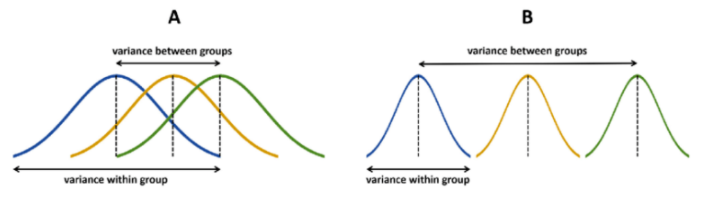

사진출처 : https://bioinformaticsandme.tistory.com/198

<br>

# 📝 **일원분산분석 (One-way ANOVA)** 


<br>

## 실습 1) 세 가지 교육방법에 따른 실기점수  

서로 독립인 세 집단의 평균 차이 검정

세 가지 교육방법을 적용하여 1개월 동안 교육받은 교육생 80명을 대상으로 실기시험을 실시한다.   
데이터 : three_sample.csv'

<br>

가설설정
> 귀무가설 : 세 가지 교육방법에 따른 실기시험 점수에 차이가 없다.  
대립가설 : 세 가지 교육방법에 따른 실기시험 점수에 차이가 있다.    



In [ ]:
import pandas as pd
import scipy.stats as stats

data = pd.read_csv('/content/drive/MyDrive/testdata/three_sample.csv')

print(data.head(3))
print(data['method'].unique())
print(data.describe())

   no  method  survey  score
0   1       1       1     72
1   2       3       1     87
2   3       2       1     78
[1 3 2]
            no     method     survey       score
count  80.0000  80.000000  80.000000   80.000000
mean   40.5000   1.962500   0.650000   78.212500
std    23.2379   0.802587   0.479979   64.886404
min     1.0000   1.000000   0.000000   33.000000
25%    20.7500   1.000000   0.000000   58.000000
50%    40.5000   2.000000   1.000000   65.000000
75%    60.2500   3.000000   1.000000   79.500000
max    80.0000   3.000000   1.000000  500.000000


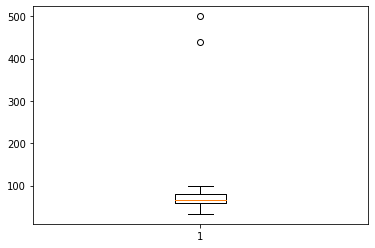

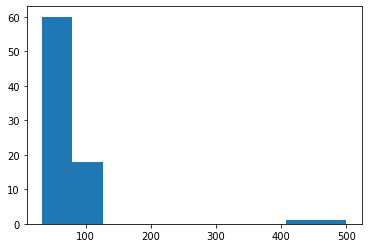

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(data.score)  #이상치 2개
plt.show()

plt.hist(data.score)
plt.show()

In [ ]:
data = data.query('score <= 100')  #이상치 제거를 위해 query 함수 사용  

print(data.describe())
print(len(data))

              no     method     survey       score
count  78.000000  78.000000  78.000000   78.000000
mean   40.666667   1.974359   0.653846   68.192308
std    23.137459   0.805410   0.478822   15.043709
min     1.000000   1.000000   0.000000   33.000000
25%    21.250000   1.000000   0.000000   58.000000
50%    40.500000   2.000000   1.000000   65.000000
75%    60.500000   3.000000   1.000000   78.000000
max    80.000000   3.000000   1.000000  100.000000
78


<br>

### 등분산성 확인  

이때, 등분산을 만족하지 못하는 경우에 사용하는 ANOVA 의 한 방법으로 Welch test 나 Brown-Forsythe test 가 있다.  

In [ ]:
result = data[['method','score']]

m1 = result[result['method']==1]
m2 = result[result['method']==2]
m3 = result[result['method']==3]

score1 = m1['score']
score2 = m2['score']
score3 = m3['score']
#print(score1)

print(stats.levene(score1, score2, score3))

LeveneResult(statistic=2.242859703028393, pvalue=0.11322850654055751)


<br>

### 정규성 확인  



In [ ]:
print(stats.ks_2samp(score1, score2).pvalue)
print(stats.ks_2samp(score1, score3).pvalue)
print(stats.ks_2samp(score2, score3).pvalue)

#만족여부에 따라 anova, Kruskal-wallis

0.3096879629845999
0.7162094473752454
0.7724081666033108


<br>

### 교차표  



In [ ]:
#교육 방법별 건수

data2 = pd.crosstab(index=data['method'], columns='count')
data2.index = ['방법1','방법2','방법3']

print(data2)

col_0  count
방법1       26
방법2       28
방법3       24


In [ ]:
#교육방법별 만족여부 건수

data3 = pd.crosstab(data.method, data.survey)
data3.index = ['방법1','방법2','방법3']
data3.columns = ['만족','불만족']

print(data3)

     만족  불만족
방법1   9   17
방법2  10   18
방법3   8   16



<br>

### ANOVA  

In [ ]:
#선형회귀 모델을 이용한 ANOVA  
#f통계량 값을 얻기 위해 선형회귀 모델 필요  

import statsmodels.api as sm
from statsmodels.formula.api import ols

reg = ols("data['score'] ~ data['method']", data=data).fit()
table = sm.stats.anova_lm(reg, type=1)
print(table)

PatsyError: ignored


p-value가 0.727597로 0.05보다 크므로 귀무가설 채택.  




|요인|자유도|제곱합|제곱평균|F값|
|-----|-----|-----|-----|----|
| 회귀 | 1 | SSR | MSR | MSR/MSE|
| 잔차 | n-2 | SSE | MSE | |
| 합 | n-1 | SST | |

SSR = RSS

In [ ]:
reg2 = ols("data.score ~ C(data.method + data.survey)", data=data).fit()
table2 = sm.stats.anova_lm(reg2, typ=2)
print(table2)

                                    sum_sq    df         F   PR(>F)
C(data.method + data.survey)    105.598291   3.0  0.150386  0.92913
Residual                      17320.517094  74.0       NaN      NaN


<br>

### 사후검정   

ANOVA는 세 개 이상의 그룹 간 평균값의 유의미한 차이를 확인할 수 있다.  그러나 어떤 그룹 간의 차이가 유의미한지, 각 그룹 간 평균값의 차이는 얼마인지는 알려주지 않는다.  그러므로 사후검정이 필요하다.  

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd  #주의할점: 비교 대상 표본수가 동일해야 한다.  

turkeyResult = pairwise_tukeyhsd(data.score, data.method)  #교육방법별 점수의 차이 확인  
print(turkeyResult)

#reject : False  평균에 유의미한 차이가 없다.
#유의미한 차이가 있을 때는 reject 가 True

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   0.9725   0.9  -8.946  10.891  False
     1      3   1.4904   0.9 -8.8184 11.7992  False
     2      3   0.5179   0.9 -9.6127 10.6484  False
---------------------------------------------------


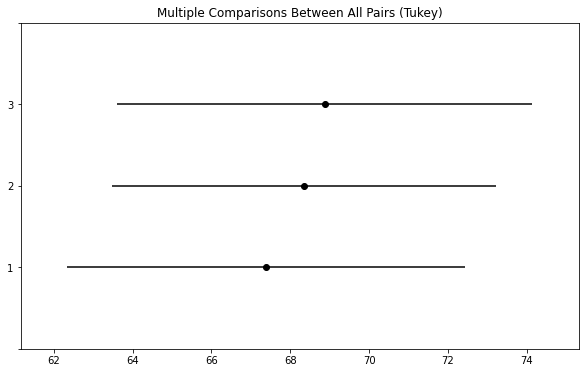

In [ ]:
turkeyResult.plot_simultaneous()
plt.show()

<br>

## 실습 2) 각 편의점의 직원 임금 차이  

세 개 지역에 위치한 편의점의 직원 임금에 대한 평균에 차이가 있는 지를 검정해보자.  


가설설정  
> 귀무가설 : 지역에 따라 급여의 평균에 차이가 있다.  
대립가설 : 지역에 따라 급여의 평균에 차이가 없다.  



In [ ]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols   #ordinary least squares  #최소제곱법  #잔차제곱합이 최소가 되는 
from statsmodels.stats.anova import anova_lm
from scipy import stats
import urllib.request
import matplotlib.pyplot as plt

#data = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/group3.txt')

url = 'https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/group3.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter = ',')
print(data)
print(type(data))
print()

gr1 = data[data[:,1]==1, 0]
gr2 = data[data[:,1]==2, 0]
gr3 = data[data[:,1]==3, 0]
print(gr1)
print(gr2)
print(gr3)
print()

print(np.average(gr1), np.mean(gr1))
print(np.average(gr2), np.mean(gr2))
print(np.average(gr3), np.mean(gr3))

[[243.   1.]
 [251.   1.]
 [275.   1.]
 [291.   1.]
 [347.   1.]
 [354.   1.]
 [380.   1.]
 [392.   1.]
 [206.   2.]
 [210.   2.]
 [226.   2.]
 [249.   2.]
 [255.   2.]
 [273.   2.]
 [285.   2.]
 [295.   2.]
 [309.   2.]
 [241.   3.]
 [258.   3.]
 [270.   3.]
 [293.   3.]
 [328.   3.]]
<class 'numpy.ndarray'>

[243. 251. 275. 291. 347. 354. 380. 392.]
[206. 210. 226. 249. 255. 273. 285. 295. 309.]
[241. 258. 270. 293. 328.]

316.625 316.625
256.44444444444446 256.44444444444446
278.0 278.0


<br>

### 시각화로 분포 확인

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


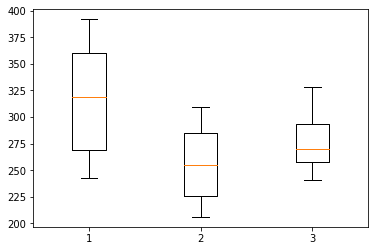

In [ ]:
plot_data = [gr1, gr2, gr3]

plt.boxplot(plot_data)
plt.show()

<br>

### 정규성 확인  

In [ ]:
print(stats.shapiro(gr1))
print(stats.shapiro(gr2))
print(stats.shapiro(gr3))

(0.9070392847061157, 0.3336853086948395)
(0.946901798248291, 0.6561065912246704)
(0.9635528922080994, 0.832481324672699)


<br>

### 등분산성 확인  


In [ ]:
print(stats.bartlett(gr1, gr2, gr3))
#print(stats.levene(gr1, gr2, gr3))

BartlettResult(statistic=2.095059428100749, pvalue=0.3508032640105389)


<br>

### 분석방법 1 : 선형회귀 모델 사용  


In [ ]:
df = pd.DataFrame(data, columns=['pay','group'])
print(df)

model = ols('pay ~ C(group)', df).fit()   #범주형으로 처리하려는 정수 변수라면 C() 연산자를 사용해 지정해준다.  
print(anova_lm(model))

      pay  group
0   243.0    1.0
1   251.0    1.0
2   275.0    1.0
3   291.0    1.0
4   347.0    1.0
5   354.0    1.0
6   380.0    1.0
7   392.0    1.0
8   206.0    2.0
9   210.0    2.0
10  226.0    2.0
11  249.0    2.0
12  255.0    2.0
13  273.0    2.0
14  285.0    2.0
15  295.0    2.0
16  309.0    2.0
17  241.0    3.0
18  258.0    3.0
19  270.0    3.0
20  293.0    3.0
21  328.0    3.0
            df        sum_sq      mean_sq         F    PR(>F)
C(group)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual  19.0  39716.097222  2090.320906       NaN       NaN



p-value가 0.043589 < 0.05 이므로 귀무가설 기각 


<br>

### 분석방법 2 : 함수 사용

In [ ]:
f, p = stats.f_oneway(gr1, gr2, gr3)

print('일원분산분석 결과')
print('f_statistic:%f, p-value: %f '%(f, p))

일원분산분석 결과
f_statistic:3.711336, p-value: 0.043589 


<br>

## 실습 3) 온도에 따른 매출액 차이  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   YMD     328 non-null    int64
 1   AMT     328 non-null    int64
 2   CNT     328 non-null    int64
dtypes: int64(3)
memory usage: 7.8 KB
None
        YMD    AMT  CNT
0  20190514      0    1
1  20190519  18000    1
2  20190521  50000    4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stnId   702 non-null    int64  
 1   tm      702 non-null    object 
 2   avgTa   702 non-null    float64
 3   minTa   702 non-null    float64
 4   maxTa   702 non-null    float64
 5   sumRn   702 non-null    float64
 6   maxWs   702 non-null    float64
 7   avgWs   702 non-null    float64
 8   ddMes   702 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 49.5+ KB
None
  

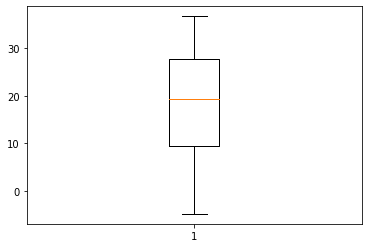

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/tsales.csv')
print(sales.info())
print(sales.head(3))
print()

weather = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/tweather.csv')
print(weather.info())
print(weather.head(3))
print()

#날씨데이터와 매출데이터의 날짜컬럼의 형식이 서로 다름. 
#하이픈을 제거하여 형식을 통일시킨다.    
weather.tm = weather.tm.map(lambda x:x.replace('-','')).astype('int64')
print(weather.head(3))

#날짜컬럼을 기준으로 조인  
frame = sales.merge(weather, how='left', left_on='YMD', right_on='tm')
print(frame.head(3))
print(frame.columns)
print()

data = frame.iloc[:,[0,1,7,8]]
print(data.head(3))

#온도 데이터 확인  
print(data.maxTa.describe())
plt.boxplot(data.maxTa)
plt.show()

<br>

일별 최고온도 -> 연속형 변수를 구간 설정을 통해 명목형 변수로 만들어 새로운 컬럼에 추가한다.    

In [ ]:
data['Ta_gubun'] = pd.cut(data.maxTa, bins= [-5, 8, 24, 37], labels = [0, 1, 2])

print(data.head(3))
print(data.isnull().sum())

        YMD    AMT  maxTa  sumRn Ta_gubun
0  20190514      0   26.9    0.0        2
1  20190519  18000   21.6   22.0        1
2  20190521  50000   23.8    0.0        1
YMD         0
AMT         0
maxTa       0
sumRn       0
Ta_gubun    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<br>

### 상관관계 확인  

In [ ]:
print(data.corr())

#온도와 매출액의 상관계수 : -0.660066

            YMD       AMT     maxTa     sumRn
YMD    1.000000  0.377072 -0.574878 -0.121767
AMT    0.377072  1.000000 -0.660066 -0.080907
maxTa -0.574878 -0.660066  1.000000  0.119268
sumRn -0.121767 -0.080907  0.119268  1.000000


<br>

### 세 그룹으로 분리  

In [ ]:
x1 = np.array(data[data.Ta_gubun==0].AMT)
x2 = np.array(data[data.Ta_gubun==1].AMT)
x3 = np.array(data[data.Ta_gubun==2].AMT)

print(x1[:5])
print(x2[:5])
print(x3[:5])
print()

spp = data.loc[:,['AMT','Ta_gubun']]
print(spp.groupby('Ta_gubun').mean())
#print(pd.pivot_table(spp, index = ['Ta_gubun'], aggfunc='mean'))

[1050500  770000 1054500  969000 1061500]
[ 18000  50000 274000 203000 381500]
[     0 125000 222500 209000 302000]

                   AMT
Ta_gubun              
0         1.032362e+06
1         8.181069e+05
2         5.537109e+05


[[    0     2]
 [18000     1]
 [50000     1]]

[1050500  770000 1054500  969000 1061500]
[ 18000  50000 274000 203000 381500]
[     0 125000 222500 209000 302000]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


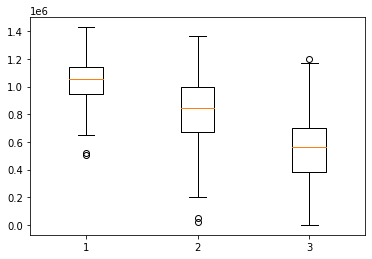

In [ ]:
sp = np.array(spp)
print(sp[:3])
print()

group1 = sp[sp[:,1]==0, 0] 
group2 = sp[sp[:,1]==1, 0] 
group3 = sp[sp[:,1]==2, 0] 

print(group1[:5])
print(group2[:5])
print(group3[:5])

plt.boxplot([group1, group2, group3])
plt.show()

<br>

### 정규성, 등분산성 확인  

콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test)은 정규분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법이다.  

In [ ]:
#정규성 확인 
print(stats.ks_2samp(group1, group2))
print(stats.ks_2samp(group1, group3))
print(stats.ks_2samp(group2, group3))
print()

#등분산성 확인
print(stats.levene(group1, group2, group3))

Ks_2sampResult(statistic=0.4490540989047461, pvalue=9.289383373634053e-09)
Ks_2sampResult(statistic=0.7713994565217391, pvalue=1.345576601411445e-23)
Ks_2sampResult(statistic=0.47095658396946566, pvalue=1.438849039914203e-13)

LeveneResult(statistic=3.276731509044197, pvalue=0.039002396565063324)



정규성, 등분산성 모두 불만족  

<br>

### ANOVA 검정  

In [ ]:
print(stats.f_oneway(group1, group2, group3))

F_onewayResult(statistic=99.1908012029983, pvalue=2.360737101089604e-34)



pvalue=2.360737101089604e-34 < 0.05 이므로 귀무가설 기각  



<br>

#### 정규성을 만족하지 못했을 때 : Kruskal-Wallis Rank Sum Test 

집단 중 하나라도 정규성 가정이 깨질 때 사용한다.  

In [ ]:
print(stats.kruskal(group1, group2, group3))

KruskalResult(statistic=132.7022591443371, pvalue=1.5278142583114522e-29)



pvalue=1.5278142583114522e-29 < 0.05 이므로 귀무가설 기각  


<br>

#### 등분산성을 만족하지 못했을 때 : Welch Anova  


In [ ]:
!pip install pingouin

     |████████████████████████████████| 205 kB 4.3 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204754 sha256=bd5140b9bbbe4cec158d142d937b4db917c5869e32c67ebfbd763f656d5ee35f
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=b1f19c43b6e276d38c8df6d6b70de98fdc52345649b5de330c87681219711093
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [ ]:
from pingouin import welch_anova

df = data
print(welch_anova(data=df, dv='AMT', between='Ta_gubun'))
#welch_anova(, data = data, dv = '양적자료', between = '집단(질적자료)')  

     Source  ddof1     ddof2           F         p-unc       np2
0  Ta_gubun      2  189.6514  122.221242  7.907874e-35  0.379038



해석 : 날씨 (추움, 보통, 더움)에 의해 매출액의 차이가 유의미한 것을 알 수 있다.  

어떤 집단 간에 차이가 있는 지, 얼마나 차이가 있는 지 알아보기 위해 사후검정을 실시한다.  

<br>

### 사후검정  

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
     0      1 -214255.4486 0.001 -296759.7083  -131751.189   True
     0      2 -478651.3813 0.001 -561488.5315 -395814.2311   True
     1      2 -264395.9327 0.001 -333329.5099 -195462.3555   True
-----------------------------------------------------------------


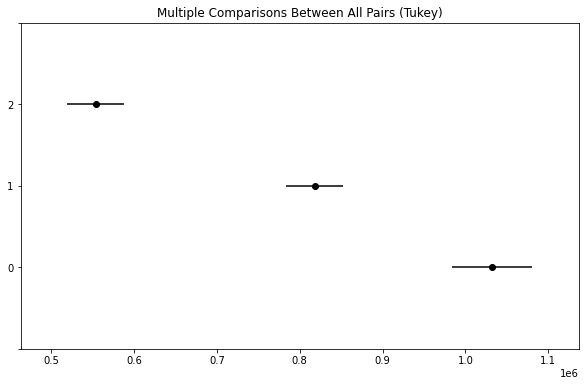

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(spp['AMT'], spp['Ta_gubun'])
print(posthoc)  #reject가 모두 True : 유의미한 차이가 존재한다.  

posthoc.plot_simultaneous()
plt.show()


온도가 매출에 영향을 준다는 것을 사후검정을 통해서도 확인할 수 있었다.  
그러나 매출에 영향을 주는 것이 온도 이외에 다양한 외적 조건도 있을 수 있다. 매출에 영향을 주는 원인과 변화는 매우 다양하다.  



<br>

# 📝 **이원분산분석 (Two-way ANOVA)**  

이원분산분석의 경우, `f_oneway()`와 같은 함수가 존재하지 않으므로 선형회귀 모델을 이용해 구한다.  




<br>

## 실습 1) 태아수, 관측자 수와 태아의 머리둘레  

가설설정  
> 귀무가설 : 태아수와 관측자수는 태아의 머리둘레와 관련이 없다. (머리둘레 평균에 차이가 없다.)  
대립가설 : 태아수와 관측자수는 태아의 머리둘레와 관련이 있다. (머리둘레 평균에 차이가 있다.)  

태아의 머리둘레는 태아수와 차이가 있어보임. 태아수와 관측자와 상호작용이 있는지 분석을 통해 확인  


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   머리둘레  태아수  관측자수
0  14.3    1     1
1  14.0    1     1
2  14.8    1     1



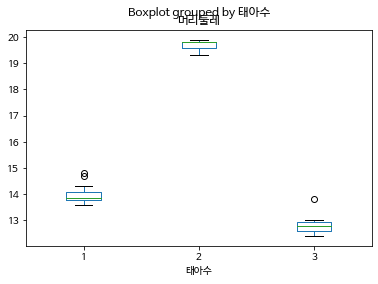

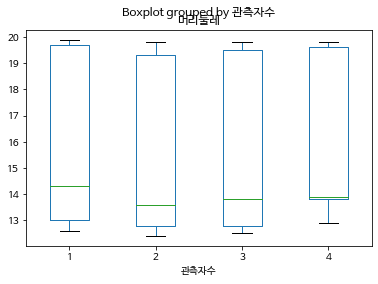

In [ ]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols  
from statsmodels.stats.anova import anova_lm  

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

url = 'https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/group3_2.txt'
data = pd.read_csv(urllib.request.urlopen(url))
print(data.head(3))
print()

data.boxplot(column='머리둘레', by='태아수', grid=False)
plt.show()
data.boxplot(column='머리둘레', by='관측자수', grid=False)
plt.show()

<br>

### 독립변인 간 상호작용 가정 없이 처리  


In [ ]:
reg = ols("data['머리둘레'] ~ C(data['태아수']) + C(data['관측자수'])", data = data).fit() 
result = anova_lm(reg, typ = 2)
print(result)  

                     sum_sq    df            F        PR(>F)
C(data['태아수'])   324.008889   2.0  2023.182239  1.006291e-32
C(data['관측자수'])    1.198611   3.0     4.989593  6.316641e-03
Residual           2.402222  30.0          NaN           NaN


<br>

### 독립변인 간 상호작용을 고려하여 처리  



In [ ]:
reg2 = ols("data['머리둘레'] ~ C(태아수) + C(관측자수) + C(태아수):C(관측자수)", data = data).fit() 
result2 = anova_lm(reg2, typ = 2)
print(result2)  

                    sum_sq    df            F        PR(>F)
C(태아수)          324.008889   2.0  2113.101449  1.051039e-27
C(관측자수)           1.198611   3.0     5.211353  6.497055e-03
C(태아수):C(관측자수)    0.562222   6.0     1.222222  3.295509e-01
Residual          1.840000  24.0          NaN           NaN


결론:  

1. C(태아수) p-value 1.051039e-27 < 0.05 로 태아수와 머리둘레는 관련성이 있는 것으로 보인다. (태아수 평균에 차이가 있다.)

2. C(관측자수) p-value 6.497055e-03 < 0.05로 관측자와 머리둘레는 관련성이 있는 것으로 보인다. (관측자 평균에 차이가 있다.)

3. C(태아수):C(관측자수) 일 때의 p-value 0.329551 > 0.05로 태아수와 관측자 사이의 상호작용이 없다.  




